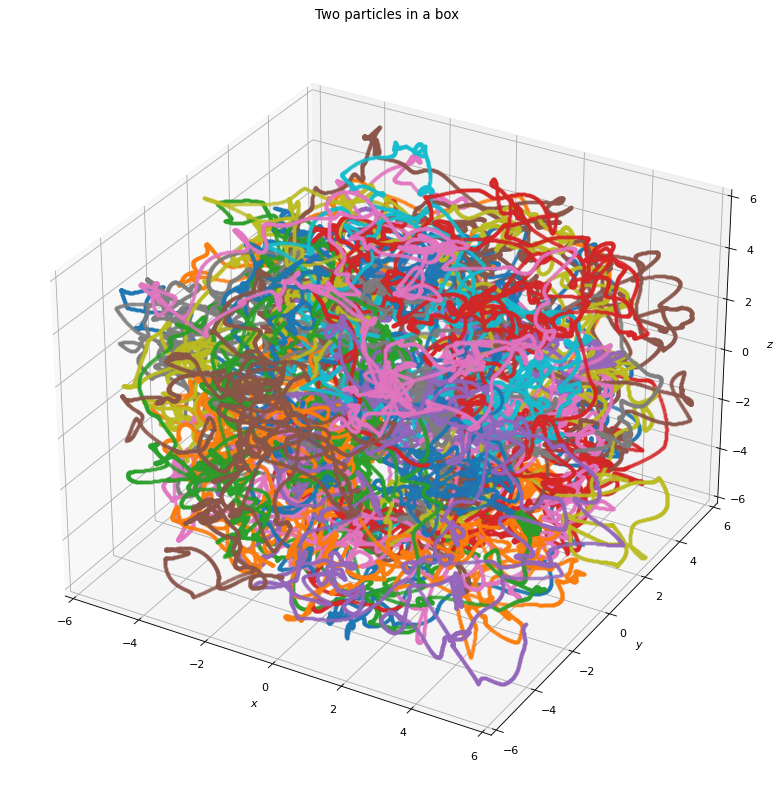

In [70]:
import csv
import numpy as np
import matplotlib.pyplot as plt
#####################
savefile = "data.csv"   #Rename to required output file
#####################
#Read in the .csv data file: 
file = open(savefile)
csvreader = csv.reader(file)
rows = []
for row in csvreader:
  rows.append(row)
file.close()

#Extract header information:
dt = float(rows[0][0]) 
T = int(rows[0][1])
Tsave = int(rows[0][2])
N = int(rows[0][3])
NumSave = int(np.ceil((T+1)/Tsave)) #Number of save entries

#Initialise storage for data:
pos = np.zeros([NumSave,N,3])
vel = np.zeros([NumSave,N,3])

#Extract and reshape the data:
data = np.zeros(3*N)

for i in range(NumSave):
      
  start = i*N + 1 #Beginning of save N=3
   
  #Vectors variables:
  for j in range(N):
    for k in range(3): 
      pos[i,j,k] = float(rows[start+j][k])
      vel[i,j,k] = float(rows[start+j][k+3])
      
#-------------------------------------------
#Plot the paths of particles:
ax = plt.figure(figsize=(15,10),dpi=80).add_subplot(projection='3d')

for j in range(N):
    ax.plot(pos[:,j,0], pos[:,j,1], pos[:,j,2], '.', markersize = 5, label = f'particle{j}', alpha = 0.2)

#ax.legend()
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.set_zlim([-6,6])
ax.set_title('Particles in a box')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.tight_layout()

figname = 'particles in a box small.png'
plt.savefig(figname, dpi=80, bbox_inches = 'tight')

plt.show()

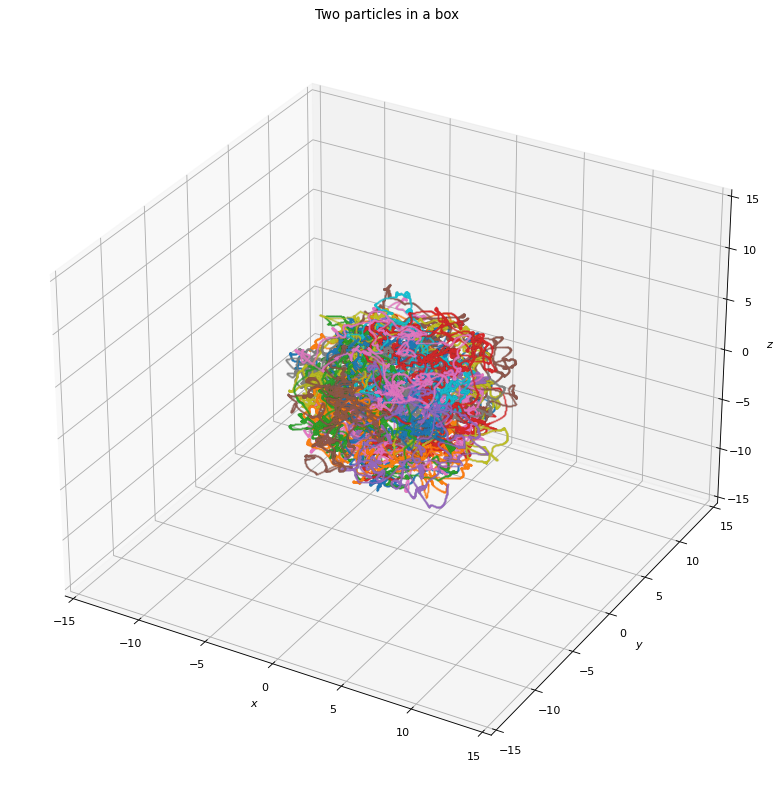

In [71]:
#-------------------------------------------
#Plot the paths of particles:
ax = plt.figure(figsize=(15,10),dpi=80).add_subplot(projection='3d')

for j in range(N):
    ax.plot(pos[:,j,0], pos[:,j,1], pos[:,j,2], '.', markersize = 1, label = f'particle{j}', alpha = 0.2)

#ax.legend()
ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.set_zlim([-15,15])
ax.set_title('Particles in a box')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.tight_layout()

figname = 'particles in a box large.png'
plt.savefig(figname, dpi=80, bbox_inches = 'tight')

plt.show()

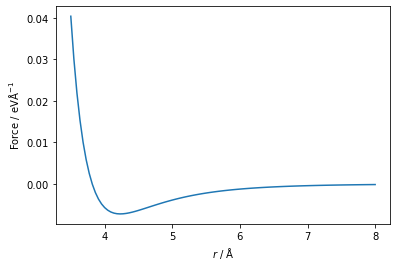

In [72]:
def lenjonesforce(distance, epsilon, sigma):
    """
    Plot the differentiated equation of the Lennard-Jones potential 
    to calculate the force of the interaction.
    
    Parameters
    ----------
    distance: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    return 24 * epsilon/distance * ((2 * np.power((sigma/distance), 12))  - (np.power((sigma/distance), 6)))
    
distance = np.linspace(3.5, 8, 100)
plt.plot(distance, lenjonesforce(distance, 0.0103, 3.4))
plt.xlabel('$r$ / Å')
plt.ylabel('Force / eVÅ$^{-1}$')
plt.show()

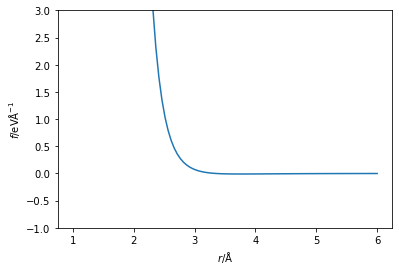

In [73]:
def lenjonespotential(distance, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction.
    
    Parameters
    ----------
    distance: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    return 4.0 * epsilon * ((sigma/distance) ** 12 - (sigma/distance) ** 6)
    
distance = np.linspace(1, 6, 100)
plt.plot(distance, lenjonespotential(distance, 0.0103, 3.345))
plt.ylim(-1, 3)
plt.xlabel('$r$/Å')
plt.ylabel('$f$/eVÅ$^{-1}$')
plt.show()